In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset**

In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv\
    -O /tmp/housing.csv



--2022-09-26 17:36:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘/tmp/housing.csv’

/tmp/housing.csv    100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-26 17:36:29 (19.8 MB/s) - ‘/tmp/housing.csv’ saved [1423529/1423529]



In [3]:
data= pd.read_csv('/tmp/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# use only these columns

cols= ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']

In [6]:
df= data[cols]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### **Data Preparation**

- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [7]:
df= df.fillna(0)
df[' rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

## Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [8]:
df.ocean_proximity.mode()

0    <1H OCEAN
dtype: object

### Make median_house_value binary

- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [9]:
df['above_average'] = (df.median_house_value > df.median_house_value.mean()).astype(int)

### Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(len(df_train), len(df_val), len(df_test))

df_train.reset_index()
df_val.reset_index()
df_test.reset_index()

12384 4128 4128


,index,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,20046,36.06,-119.01,25.0,1505.0,0.0,1392.0,359.0,1.6812,47700.0,INLAND,4.192201,0.000000,3.877437,0
1,3024,35.14,-119.46,30.0,2943.0,0.0,1565.0,584.0,2.5313,45800.0,INLAND,5.039384,0.000000,2.679795,0
2,15663,37.80,-122.44,52.0,3830.0,0.0,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.977155,0.000000,1.360332,1
3,20484,34.28,-118.72,17.0,3051.0,0.0,1705.0,495.0,5.7376,218600.0,<1H OCEAN,6.163636,0.000000,3.444444,1
4,9814,36.62,-121.93,34.0,2351.0,0.0,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,5.492991,0.000000,2.483645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,15362,33.36,-117.22,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN,7.002212,0.152291,2.988938,1
4124,16623,35.36,-120.83,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN,6.131915,0.204950,2.340426,1
4125,18086,37.31,-122.05,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN,7.237676,0.130868,2.790493,1
4126,2144,36.77,-119.76,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND,5.289030,0.185880,2.588608,0


In [11]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

for c in ['median_house_value']:
    del df_train[c]
    del df_val[c]
    del df_test[c]

In [12]:
numerical = list((df.dtypes[df.dtypes != 'object'].index))

# remove target variables
numerical.remove('median_house_value') 
numerical.remove('above_average')

numerical

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 ' rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [13]:
categorical = list((df.dtypes[df.dtypes == 'object'].index))
categorical

['ocean_proximity']

## Question 2

- Create the correlation matrix for the numerical features of your train dataset
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

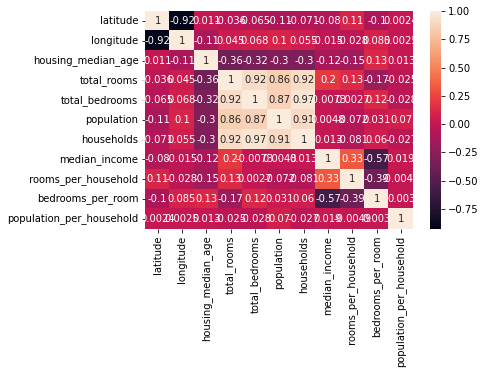

In [14]:
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix,annot=True, fmt='.2g')

> features that have the biggest correlation in this dataset is total_bedrooms and households

## Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

In [15]:
from sklearn.metrics import mutual_info_score
score = mutual_info_score(df_train.above_average, df_train.ocean_proximity).round(2)
score

0.1

## Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [16]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dicts_train = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

dicts_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)
val_pred = model.predict_proba(X_val)[:,1] >= 0.5

val_pred_accuracy = (val_pred == y_val).mean()
val_pred_accuracy.round(2)


0.84

## Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    -total_rooms
    -total_bedrooms
    -population
    -households
>note: the difference doesn't have to be positive

In [17]:
columns = categorical + numerical
tlist = list()

for c in columns:
    tolumns = columns.copy()
    tolumns.remove(c)
    
    # hot-one encoding train data
    dicts_train_small = df_train[tolumns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train_small = dv.fit_transform(dicts_train_small)
    
    # traning the model with train data
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_small, y_train) # training the model with the subset of features
    
    # hot-one encoding validation data
    dicts_val_small = df_val[tolumns].to_dict(orient='records')
    X_val_small = dv.transform(dicts_val_small)
    
    # calculate prediction using the trained model
    val_small_pred = model.predict_proba(X_val_small)[:,1] >= 0.5
    val_small_pred
    
    # Calculate relative frequency
    val_small_pred_accuracy = (val_small_pred == y_val).mean()
    
    # find diff with original accuracy from full validation dataset
    diff = val_small_pred_accuracy - val_pred_accuracy
    tlist.append({'col' : c,  'accuracy' : abs(diff)}) # abs to remove sign

sorted(tlist, key = lambda d: d['accuracy'])

[{'col': 'total_bedrooms', 'accuracy': 0.0},
 {'col': 'bedrooms_per_room', 'accuracy': 0.0007267441860464574},
 {'col': 'households', 'accuracy': 0.0007267441860465684},
 {'col': 'latitude', 'accuracy': 0.0009689922480620172},
 {'col': 'total_rooms', 'accuracy': 0.0009689922480620172},
 {'col': ' rooms_per_household', 'accuracy': 0.0009689922480620172},
 {'col': 'population_per_household', 'accuracy': 0.0016957364341084746},
 {'col': 'longitude', 'accuracy': 0.0031492248062016115},
 {'col': 'housing_median_age', 'accuracy': 0.0043604651162790775},
 {'col': 'population', 'accuracy': 0.008963178294573715},
 {'col': 'ocean_proximity', 'accuracy': 0.015019379844961267},
 {'col': 'median_income', 'accuracy': 0.04893410852713187}]

## Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
>If there are multiple options, select the smallest alpha.

In [18]:
df['log_price'] = np.log1p(df.median_house_value)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=.2/.8, random_state=42)

y_train = df_train.log_price.values
y_val = df_val.log_price.values
y_test = df_test.log_price.values

# deleting the targets from the xs
del(df_train['median_house_value'])
del(df_val['median_house_value'])
del(df_test['median_house_value'])

# deleting the targets from the xs
del(df_train['log_price'])
del(df_val['log_price'])
del(df_test['log_price'])

In [19]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0, solver="sag", random_state=42)
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_pred, y_val, squared=False)
rmse

0.523677755585077

In [20]:
for a in [0, 0.01, 0.1, 1, 10]:
    train_dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dicts)
    
    X_train = dv.fit_transform(train_dicts)
    
    val_dicts = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    model = model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    rmse = round(mean_squared_error(y_pred, y_val, squared=False), 3)
    
    print(f'alpha: {a}    rmse:{rmse}')
    print()

alpha: 0    rmse:0.524

alpha: 0.01    rmse:0.524

alpha: 0.1    rmse:0.524

alpha: 1    rmse:0.524

alpha: 10    rmse:0.524

